# Doctor fee consultation Project

In [1263]:
# Importing Required libraries

In [1264]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [1265]:
df_train = pd.read_excel("C:/Users/1234a/Desktop/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx")
df_test = pd.read_excel("C:/Users/1234a/Desktop/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")

In [1266]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [1267]:
df_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [1268]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [1269]:
# Checking the shape of train and test data

print('Train_data:',df_train.shape)
print('\n')
print('Test_data:',df_test.shape)

Train_data: (5961, 7)


Test_data: (1987, 6)


# Train Data

In [1270]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [1271]:
df_train.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,True,False,False,True,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


In [1272]:
df_train.isnull().values.any()

True

In [1273]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [1274]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [1275]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1276]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

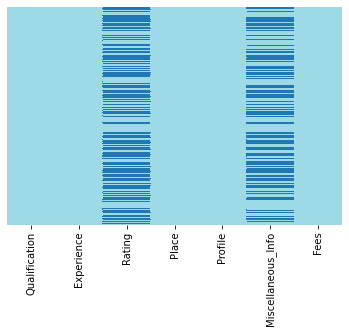

In [1277]:
# Now again check it via visualization
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

# Summary Statistics

In [1278]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


# EDA (Exploratory Data Analysis)

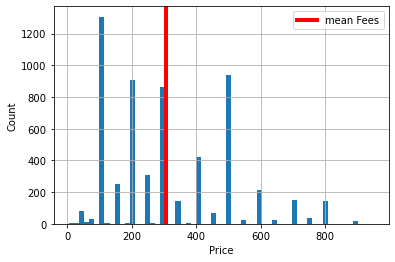

In [1279]:
#checking the mean price

Fees = df_train['Fees'].hist(bins=60)
mean_val = np.mean(df_train['Fees'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean Fees')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

In [1280]:
df_train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [1281]:
df_train['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [1282]:
df_train['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [1283]:
df_train['Fees'].unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

In [1284]:
df_train['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [1285]:
df_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [1286]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1287]:
df_train = df_train.join(df_train['Place'].str.split(',', expand=True).add_prefix('Place'))

In [1288]:
df_train = df_train.join(df_train['Experience'].str.split(expand=True).add_prefix('Experience'))

In [1289]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place0,Place1,Place2,Experience0,Experience1,Experience2
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,None,24,years,experience
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,None,12,years,experience
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,None,9,years,experience
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,None,12,years,experience
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,None,20,years,experience
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,None,19,years,experience
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,Nungambakkam,Chennai,None,33,years,experience
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,None,41,years,experience
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,None,15,years,experience


In [1290]:
df_train.drop(df_train.columns[[1,3,5,9,11,12]],axis=1,inplace=True)

In [1291]:
df_train

,Qualification,Rating,Profile,Fees,Place0,Place1,Experience0
0,"BHMS, MD - Homeopathy",100%,Homeopath,100,Kakkanad,Ernakulam,24
1,"BAMS, MD - Ayurveda Medicine",98%,Ayurveda,350,Whitefield,Bangalore,12
2,"MBBS, MS - Otorhinolaryngology",NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,9
3,"BSc - Zoology, BAMS",NaN,Ayurveda,250,Bannerghatta Road,Bangalore,12
4,BAMS,100%,Ayurveda,250,Keelkattalai,Chennai,20
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",98%,ENT Specialist,300,Basavanagudi,Bangalore,19
5957,MBBS,NaN,General Medicine,100,Nungambakkam,Chennai,33
5958,MBBS,97%,General Medicine,600,Greater Kailash Part 2,Delhi,41
5959,"MBBS, MD - General Medicine",90%,General Medicine,100,Vileparle West,Mumbai,15


In [1292]:
df_train['Rating'] = df_train['Rating'].str.rstrip('%').astype('float') / 100.0

In [1293]:
df_train

,Qualification,Rating,Profile,Fees,Place0,Place1,Experience0
0,"BHMS, MD - Homeopathy",1.00,Homeopath,100,Kakkanad,Ernakulam,24
1,"BAMS, MD - Ayurveda Medicine",0.98,Ayurveda,350,Whitefield,Bangalore,12
2,"MBBS, MS - Otorhinolaryngology",NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,9
3,"BSc - Zoology, BAMS",NaN,Ayurveda,250,Bannerghatta Road,Bangalore,12
4,BAMS,1.00,Ayurveda,250,Keelkattalai,Chennai,20
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",0.98,ENT Specialist,300,Basavanagudi,Bangalore,19
5957,MBBS,NaN,General Medicine,100,Nungambakkam,Chennai,33
5958,MBBS,0.97,General Medicine,600,Greater Kailash Part 2,Delhi,41
5959,"MBBS, MD - General Medicine",0.90,General Medicine,100,Vileparle West,Mumbai,15


In [1294]:
df_train.rename(columns = {'Place0':'Location'}, inplace = True) 
df_train.rename(columns = {'Place1':'City'}, inplace = True)
df_train.rename(columns = {'Experience0':'Experience'}, inplace =True)

In [1295]:
df_train

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,"BHMS, MD - Homeopathy",1.00,Homeopath,100,Kakkanad,Ernakulam,24
1,"BAMS, MD - Ayurveda Medicine",0.98,Ayurveda,350,Whitefield,Bangalore,12
2,"MBBS, MS - Otorhinolaryngology",NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,9
3,"BSc - Zoology, BAMS",NaN,Ayurveda,250,Bannerghatta Road,Bangalore,12
4,BAMS,1.00,Ayurveda,250,Keelkattalai,Chennai,20
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",0.98,ENT Specialist,300,Basavanagudi,Bangalore,19
5957,MBBS,NaN,General Medicine,100,Nungambakkam,Chennai,33
5958,MBBS,0.97,General Medicine,600,Greater Kailash Part 2,Delhi,41
5959,"MBBS, MD - General Medicine",0.90,General Medicine,100,Vileparle West,Mumbai,15


In [1296]:
le=LabelEncoder()
df_train['Qualification']=le.fit_transform(df_train['Qualification'])
df_train['Qualification']

0        401
1         73
2       1135
3        464
4         10
        ... 
5956    1075
5957     596
5958     596
5959     943
5960     243
Name: Qualification, Length: 5961, dtype: int32

In [1297]:
le=LabelEncoder()
df_train['Profile']=le.fit_transform(df_train['Profile'])
df_train['Profile']

0       5
1       0
2       3
3       0
4       0
       ..
5956    3
5957    4
5958    4
5959    4
5960    1
Name: Profile, Length: 5961, dtype: int32

In [1298]:
df_train['City'].unique

<bound method Series.unique of 0        Ernakulam
1        Bangalore
2        Bangalore
3        Bangalore
4          Chennai
           ...    
5956     Bangalore
5957       Chennai
5958         Delhi
5959        Mumbai
5960         Delhi
Name: City, Length: 5961, dtype: object>

In [1299]:
df_train.isnull().sum()

Qualification       0
Rating           3302
Profile             0
Fees                0
Location           25
City               26
Experience          0
dtype: int64

In [1300]:
df_train.mean()

Qualification    596.857574
Rating             0.946435
Profile            2.441872
Fees             307.944640
Experience              inf
dtype: float64

In [1301]:
df_train.fillna(df_train.mean(), inplace=True)

In [1302]:
df_train['Location']=df_train['Location'].fillna((df_train['Location'].mode))
df_train['City']=df_train['City'].fillna((df_train['City'].mode))

In [1303]:
df_train.isnull().sum()

Qualification    0
Rating           0
Profile          0
Fees             0
Location         0
City             0
Experience       0
dtype: int64

In [1304]:
cols_object_int=["Experience"]
for col in cols_object_int:
    df_train[col]=df_train[col].astype(int)

In [1305]:
cols_object_str=["City"]
for col in cols_object_str:
    df_train[col]=df_train[col].astype(str)

In [1306]:
le=LabelEncoder()
df_train['City']=le.fit_transform(df_train['City'])
df_train['City']

0       4
1       0
2       0
3       0
4       1
       ..
5956    0
5957    1
5958    3
5959    6
5960    3
Name: City, Length: 5961, dtype: int32

In [1307]:
cols_object_str=["Location"]
for col in cols_object_str:
    df_train[col]=df_train[col].astype(str)

In [1308]:
df_train.dtypes

Qualification      int32
Rating           float64
Profile            int32
Fees               int64
Location          object
City               int32
Experience         int32
dtype: object

In [1309]:
le=LabelEncoder()
df_train['Location']=le.fit_transform(df_train['Location'])
df_train['Location']

0       297
1       856
2       453
3        69
4       336
       ... 
5956     71
5957    536
5958    216
5959    841
5960    598
Name: Location, Length: 5961, dtype: int32

In [1310]:
df_train

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,401,1.000000,5,100,297,4,24
1,73,0.980000,0,350,856,0,12
2,1135,0.946435,3,300,453,0,9
3,464,0.946435,0,250,69,0,12
4,10,1.000000,0,250,336,1,20
...,...,...,...,...,...,...,...
5956,1075,0.980000,3,300,71,0,19
5957,596,0.946435,4,100,536,1,33
5958,596,0.970000,4,600,216,3,41
5959,943,0.900000,4,100,841,6,15


In [1311]:
# Data visualizations

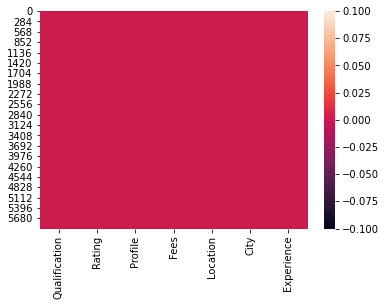

In [1312]:
sns.heatmap(df_train.isnull())

In [1313]:
df_train.isnull()

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


In [1314]:
# To check Correlation

In [1315]:
df_traincor=df_train.corr()
df_traincor

,Qualification,Rating,Profile,Fees,Location,City,Experience
Qualification,1.000000,-0.162372,0.393123,0.263214,0.006684,-0.030742,0.134697
Rating,-0.162372,1.000000,-0.111018,-0.090106,0.015586,0.024882,-0.177438
Profile,0.393123,-0.111018,1.000000,0.145226,0.020439,-0.017894,0.202073
Fees,0.263214,-0.090106,0.145226,1.000000,-0.048514,-0.041873,0.002117
Location,0.006684,0.015586,0.020439,-0.048514,1.000000,-0.100995,0.021377
City,-0.030742,0.024882,-0.017894,-0.041873,-0.100995,1.000000,0.013826
Experience,0.134697,-0.177438,0.202073,0.002117,0.021377,0.013826,1.000000


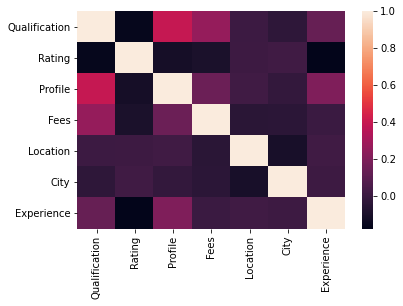

In [1316]:
sns.heatmap(df_traincor)

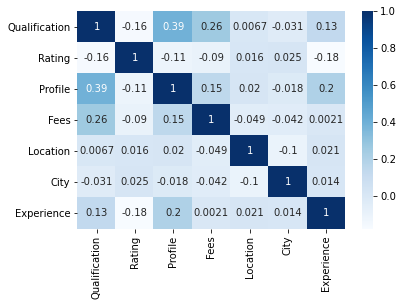

In [1317]:
plt.figure(figsize=(6,4))
sns.heatmap(df_traincor,cmap='Blues',annot=True)

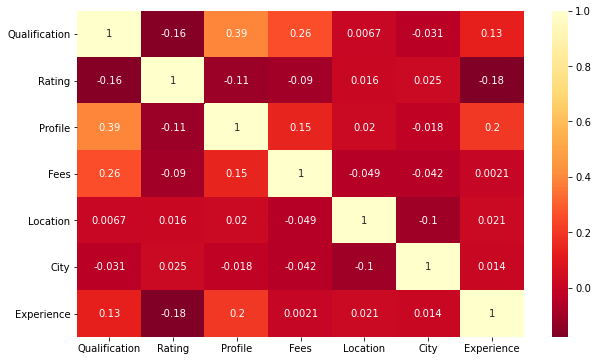

In [1318]:
plt.figure(figsize=(10,6))
sns.heatmap(df_traincor,cmap='YlOrRd_r',annot=True)

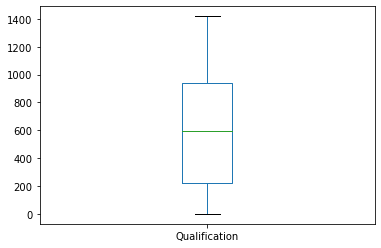

In [1319]:
#univariate analysis
df_train['Qualification'].plot.box()

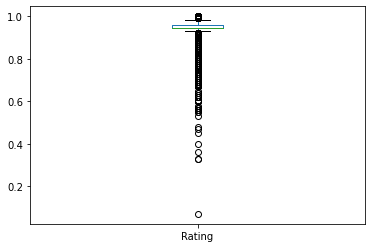

In [1320]:
df_train['Rating'].plot.box()

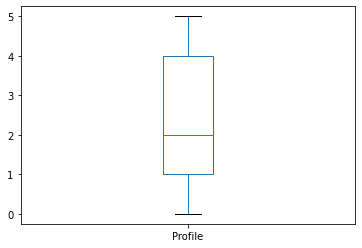

In [1321]:
df_train['Profile'].plot.box()

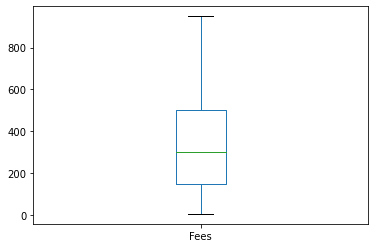

In [1322]:
df_train['Fees'].plot.box()

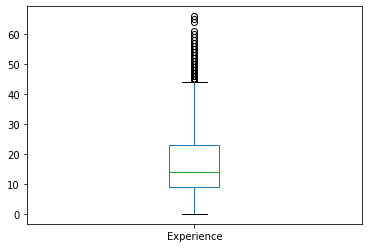

In [1323]:
df_train['Experience'].plot.box()

In [1324]:
collist=df_train.columns.values
ncol=12
nrows=10

In [1325]:
plt.subplot?

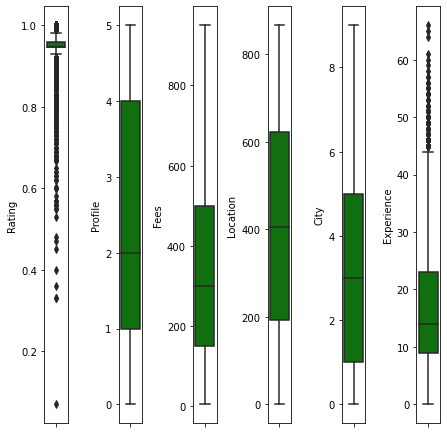

In [1326]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

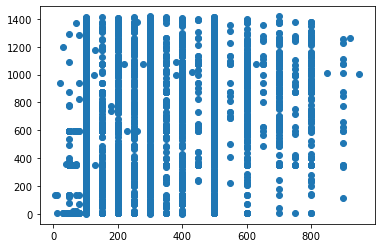

In [1327]:
#bivariate analysis
plt.scatter(df_train['Fees'],df_train['Qualification'])

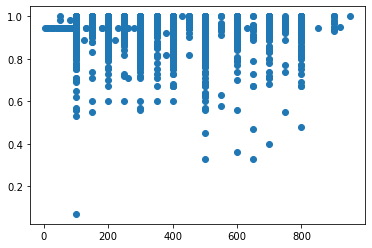

In [1328]:
plt.scatter(df_train['Fees'],df_train['Rating'])

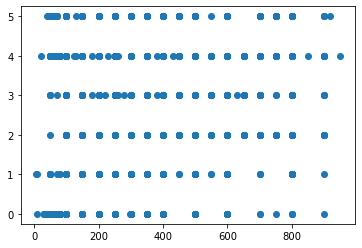

In [1329]:
plt.scatter(df_train['Fees'],df_train['Profile'])

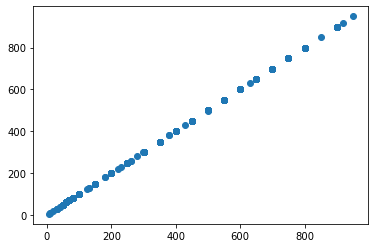

In [1330]:
plt.scatter(df_train['Fees'],df_train['Fees'])

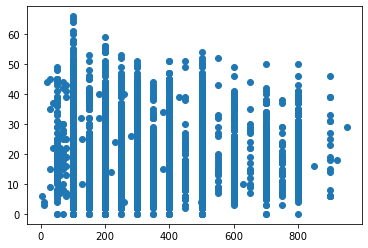

In [1331]:
plt.scatter(df_train['Fees'],df_train['Experience'])

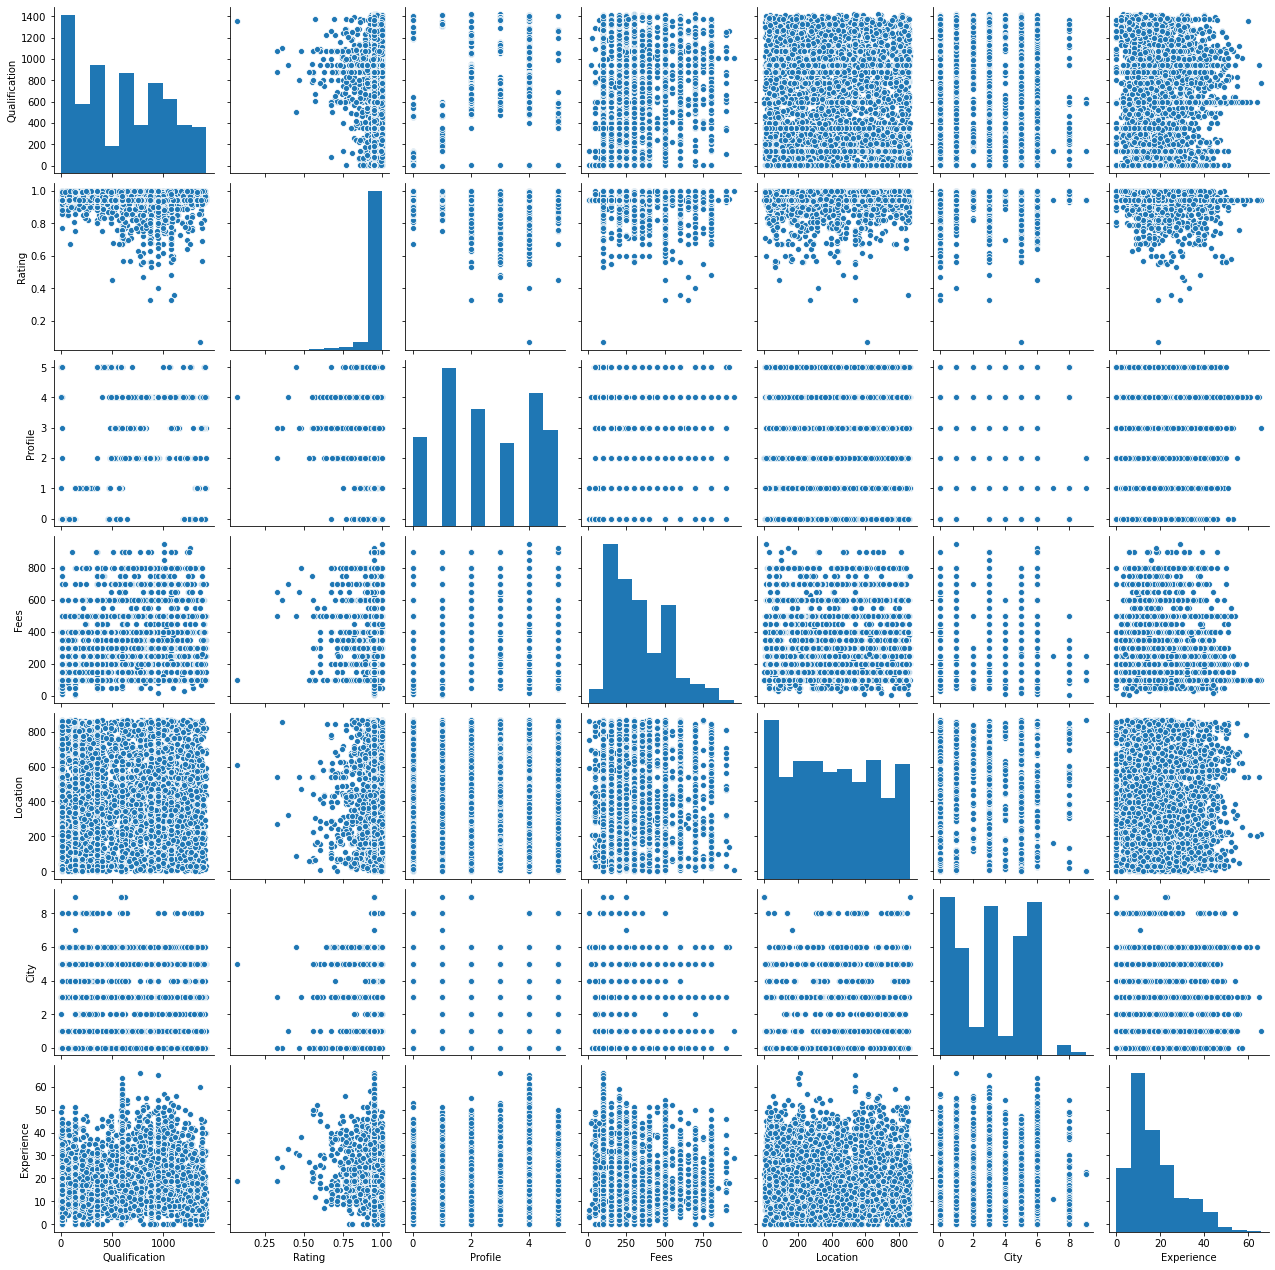

In [1332]:
sns.pairplot(df_train)

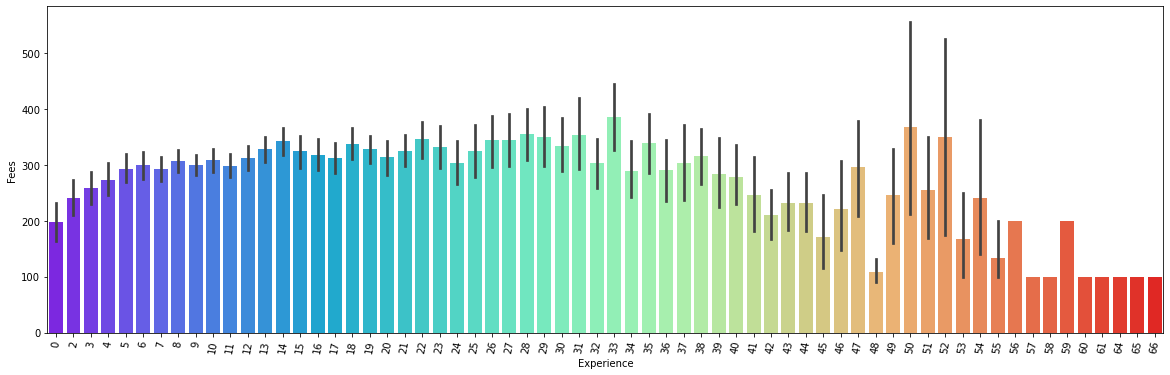

In [1333]:
plt.figure(figsize=(20,6))
sns.barplot(x='Experience', y='Fees', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

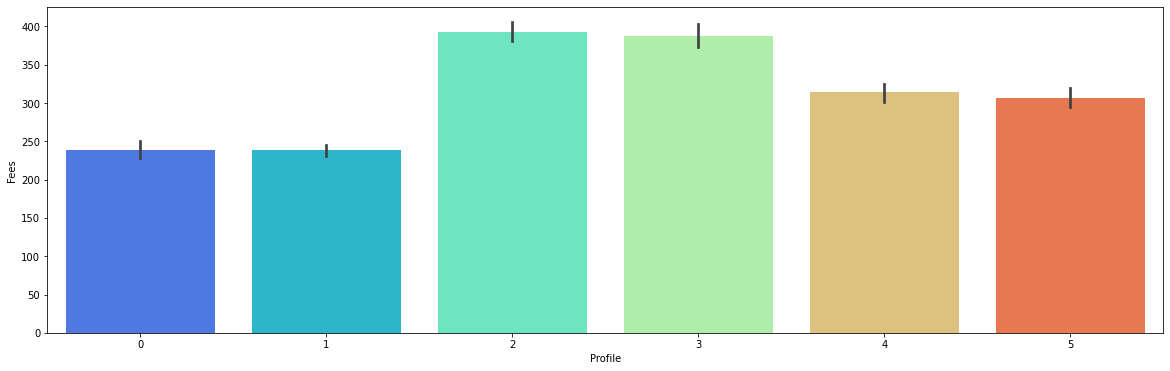

In [1334]:
plt.figure(figsize=(20,6))
sns.barplot(x='Profile', y='Fees', data=df_train,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

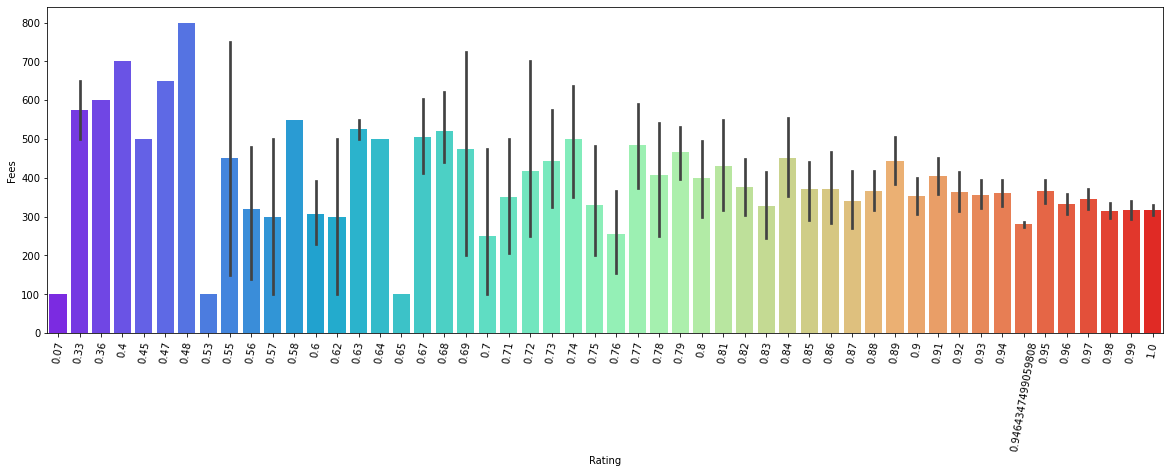

In [1335]:
plt.figure(figsize=(20,6))
sns.barplot(x='Rating', y='Fees', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

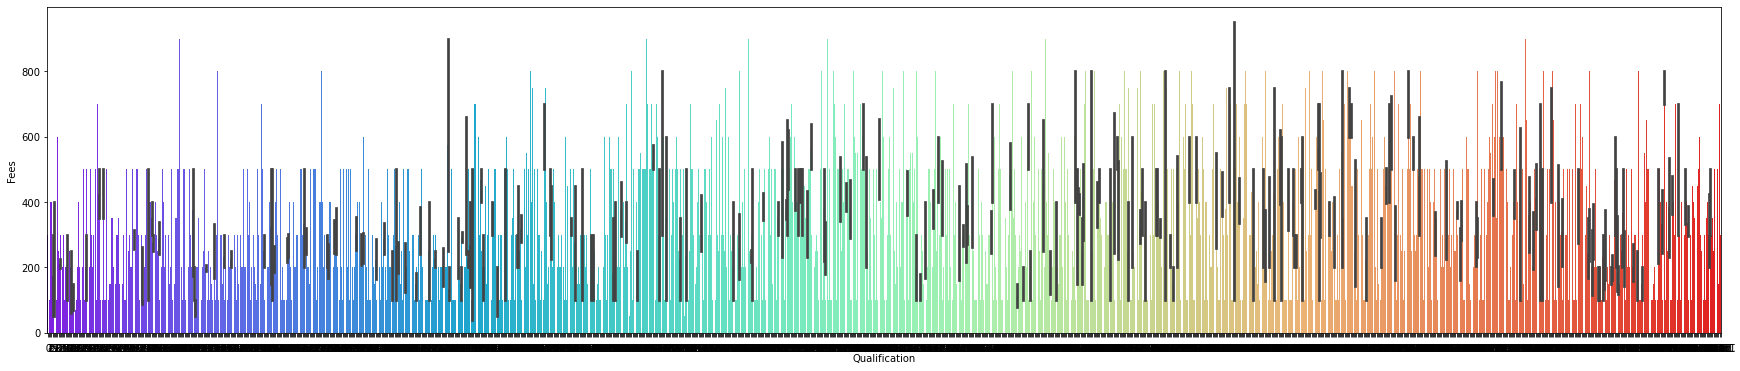

In [1336]:
plt.figure(figsize=(30,6))
sns.barplot(x='Qualification', y='Fees', data=df_train,palette='rainbow')
plt.xticks(rotation=180)
plt.show()

In [1337]:
# To check distribution of skewness

In [1338]:
df_train.dtypes

Qualification      int32
Rating           float64
Profile            int32
Fees               int64
Location           int32
City               int32
Experience         int32
dtype: object

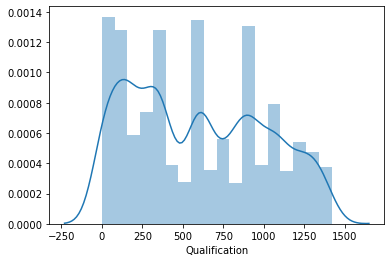

In [1339]:
sns.distplot(df_train['Qualification'])

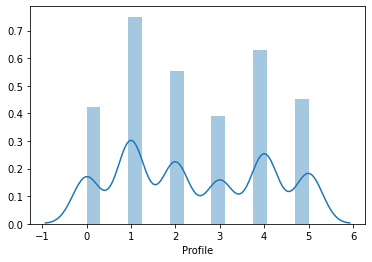

In [1340]:
sns.distplot(df_train['Profile'])

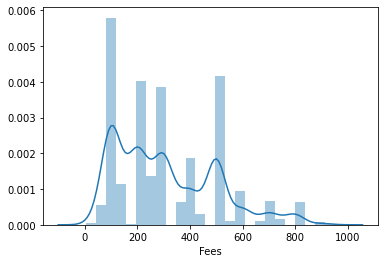

In [1341]:
sns.distplot(df_train['Fees'])

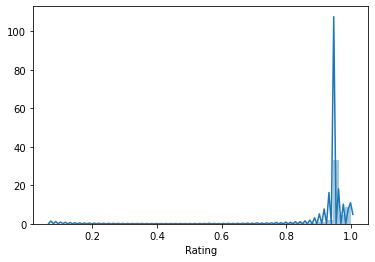

In [1342]:
sns.distplot(df_train['Rating'])

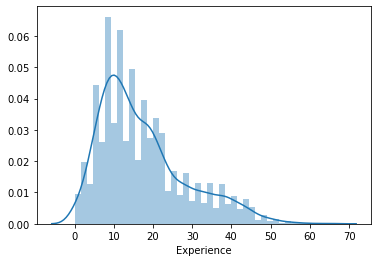

In [1343]:
sns.distplot(df_train['Experience'])

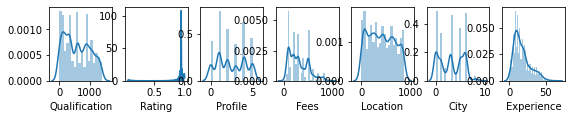

In [1344]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_train[collist[i]])

In [1345]:
# Removing Outliers

In [1346]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[4.73305738e-01, 1.02150372e+00, 1.54301587e+00, ...,
        4.41615434e-01, 3.83286234e-01, 6.00978850e-01],
       [1.26594438e+00, 6.40098345e-01, 1.47289258e+00, ...,
        1.73976499e+00, 1.31827343e+00, 4.76040293e-01],
       [1.30046489e+00, 8.46890065e-15, 3.36652489e-01, ...,
        1.67141893e-01, 1.31827343e+00, 7.45295079e-01],
       ...,
       [2.07239780e-03, 4.49395656e-01, 9.39834180e-01, ...,
        7.57700970e-01, 4.21036824e-02, 2.12675597e+00],
       [8.36481290e-01, 8.85523167e-01, 9.39834180e-01, ...,
        1.68123063e+00, 1.23406607e+00, 2.06785507e-01],
       [8.55125573e-01, 1.02150372e+00, 8.69710893e-01, ...,
        7.32974025e-01, 4.21036824e-02, 2.72823168e-02]])

In [1347]:
threshold=3
print(np.where(z>3))

(array([  55,   67,  105,  110,  140,  178,  183,  209,  275,  293,  309,
        325,  333,  372,  377,  458,  465,  585,  590,  632,  692,  731,
        787,  788,  815,  901,  911,  918,  968,  979,  987,  990,  998,
       1009, 1018, 1111, 1170, 1240, 1303, 1314, 1392, 1425, 1433, 1444,
       1475, 1594, 1614, 1631, 1648, 1717, 1741, 1747, 1778, 1796, 1852,
       1860, 1877, 1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262,
       2277, 2281, 2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548,
       2585, 2623, 2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829,
       2833, 2962, 2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270,
       3333, 3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608,
       3615, 3627, 3661, 3676, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
       4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344, 4459,
       4474, 4478, 4509, 4581, 4608, 4609, 4612, 4730, 4763, 4775, 4808,
       4825, 4835, 4843, 4851, 4880, 4971, 5028, 5

In [1348]:
#row and column

z[13][2]

0.8697108932545347

In [1349]:
z[15][5]

0.8086761512439766

In [1350]:
df_train1=df_train[(z<3).all(axis=1)]

In [1351]:
df_train1

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,401,1.000000,5,100,297,4,24
1,73,0.980000,0,350,856,0,12
2,1135,0.946435,3,300,453,0,9
3,464,0.946435,0,250,69,0,12
4,10,1.000000,0,250,336,1,20
...,...,...,...,...,...,...,...
5956,1075,0.980000,3,300,71,0,19
5957,596,0.946435,4,100,536,1,33
5958,596,0.970000,4,600,216,3,41
5959,943,0.900000,4,100,841,6,15


In [1352]:
print("training data before removing outliers",df_train.shape)
print('\n')
print("training data after removing outliers",df_train1.shape)

training data before removing outliers (5961, 7)


training data after removing outliers (5780, 7)


In [1353]:
#220 rows are related as an outliers

In [1461]:
df_train.dtypes

Qualification      int32
Rating           float64
Profile            int32
Fees               int64
Location           int32
City               int32
Experience         int32
dtype: object

In [1480]:
cols_object_int=["Fees"]
for col in cols_object_int:
    df_train1[col]=df_train1[col].astype(int)

In [1481]:
df_train1.dtypes

Qualification      int32
Rating           float64
Profile            int32
Fees               int32
Location           int32
City               int32
Experience       float64
dtype: object

In [1482]:
df_train1.skew()

Qualification    0.275917
Rating          -1.537643
Profile          0.137481
Fees            -0.273022
Location         0.114052
City             0.079698
Experience      -0.930874
dtype: float64

In [1483]:
# Trating skewness via log method

for col in df_train1.columns:
    if df_train1[col].skew()>0.55:
        df_train1[col]=np.log1p(df_train1[col])

In [1484]:
df_train1.skew()

Qualification    0.275917
Rating          -1.537643
Profile          0.137481
Fees            -0.273022
Location         0.114052
City             0.079698
Experience      -0.930874
dtype: float64

In [1485]:
df_train1.describe()

,Qualification,Rating,Profile,Fees,Location,City,Experience
count,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000,5780.000000
mean,588.949654,0.952226,2.419723,5.005882,410.521799,3.106574,2.683558
std,415.093544,0.031114,1.668689,0.747587,256.932887,2.353305,0.686471
min,0.000000,0.790000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,219.000000,0.946435,1.000000,5.000000,192.000000,1.000000,2.302585
50%,596.000000,0.946435,2.000000,5.000000,405.000000,3.000000,2.708050
75%,943.000000,0.970000,4.000000,6.000000,627.000000,5.000000,3.135494
max,1419.000000,1.000000,5.000000,6.000000,866.000000,9.000000,3.931826


In [1486]:
df_train1

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,401,1.000000,5,4,297,4,3.218876
1,73,0.980000,0,5,856,0,2.564949
2,1135,0.946435,3,5,453,0,2.302585
3,464,0.946435,0,5,69,0,2.564949
4,10,1.000000,0,5,336,1,3.044522
...,...,...,...,...,...,...,...
5956,1075,0.980000,3,5,71,0,2.995732
5957,596,0.946435,4,4,536,1,3.526361
5958,596,0.970000,4,6,216,3,3.737670
5959,943,0.900000,4,4,841,6,2.772589


In [1487]:
# Regressor Model Building

In [1488]:
y=df_train1.iloc[:,3]
y

0       4
1       5
2       5
3       5
4       5
       ..
5956    5
5957    4
5958    6
5959    4
5960    5
Name: Fees, Length: 5780, dtype: int32

In [1489]:
x =df_train1.iloc[:,[0,1,2,4,5,6]]
x

,Qualification,Rating,Profile,Location,City,Experience
0,401,1.000000,5,297,4,3.218876
1,73,0.980000,0,856,0,2.564949
2,1135,0.946435,3,453,0,2.302585
3,464,0.946435,0,69,0,2.564949
4,10,1.000000,0,336,1,3.044522
...,...,...,...,...,...,...
5956,1075,0.980000,3,71,0,2.995732
5957,596,0.946435,4,536,1,3.526361
5958,596,0.970000,4,216,3,3.737670
5959,943,0.900000,4,841,6,2.772589


In [1490]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [1491]:
print(x_train.shape, '\t',x_test.shape)

(4046, 6) 	 (1734, 6)


In [1492]:
print(y_train.shape, '\t' ,y_test.shape)

(4046,) 	 (1734,)


In [1493]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1494]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.05447457454030735
Error:
Mean absolute error: 0.5731574251380768
Mean squared error: 0.5383346021950569
Root Mean Squared Error: 0.7337128881211348
r2_score:  0.04715437101905828
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 0.99733234756052
Error:
Mean absolute error: 0.6539792387543253
Mean squared error: 0.9114763552479815
Root Mean Squared Error: 0.9547127082258733
r2_score:  -0.6133019454373352
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.32286088911198674
Error:
Mean absolute error: 0.5982698961937717
Mean squared error: 0.5754786620530564
Root Mean Squared Error: 0.7586030991586157
r2_score:  -0.01859015837583544
*************************************************************************************************************


Score of SVR() i

In [1495]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [0.06222719 0.0385627  0.04253781 0.06544847]
Mean Score: 0.05219403981659637
Standard deviation: 0.011783463849819285
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [-0.65272424 -0.46191547 -0.45687679 -0.58116212]
Mean Score: -0.5381696555682703
Standard deviation: 0.08275616893578176
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-0.05197667 -0.02293003  0.00501309  0.00615385]
Mean Score: -0.015934941739193242
Standard deviation: 0.023846760974405922
*************************************************************************************************************


Score of SVR() is :
Score: [0.0371586  0.02851992 0.02983962 0.04410254]
Mean Score: 0.03490517114398048
Standard deviation: 0.006247016321548237
************************

In [1496]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [1497]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error :', mean_squared_error(y_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y_test,predrd))
print("\n")
print("r2_score:",r2_score(y_test,predrd))

Score: 0.05446329307090003


Mean absolute error: 0.5732059824611664
Mean squared error : 0.5383698632068467
Root Mean Squared error: 0.5383698632068467


r2_score: 0.04709195946159883


In [1498]:
# cross Validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.06209918 0.03875781 0.042496   0.06543942]
Mean Score: 0.052198102586203526
Standard deviation: 0.011706152544513529


In [1499]:
# Using Ensemble Technique to Boostup our score

In [1500]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error :', mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))

Score: 0.8617452040690372


Mean absolute error: 0.5584871203383314
Mean squared error : 0.510084276079713
Root Mean Squared Error: 0.714201845474872


r2_score: 0.09715710100619424


In [1501]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

Score: 0.04211674253162678


Mean absolute error: 0.5744046685932473
Mean squared error: 0.5461615518802694
Root Mean Squared Error: 0.7390274364868124


r2_score: 0.033300766280668914


In [1502]:
# Cross Validate AdaBoost Regressor

score=cross_val_score(adb,x,y,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [0.04413394 0.02867966 0.03339669 0.05169772]
Mean Score: 0.03947700327826256
Standard deviation: 0.009008132594904798


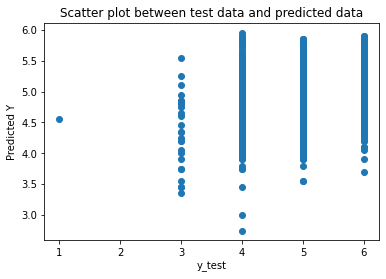

In [1503]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [1504]:
#Saving the randomforest Regressor

In [1505]:
df_train2=pd.DataFrame(predrf)
df_train2.to_csv('rf_Docpredicton.csv')

In [1506]:
#Saving the Randomdorest Regressor with Pickle 

In [1507]:
# Saving the model

import pickle
filename = 'model.pkl1'
pickle.dump(rf,open(filename,'wb'))

# Using the test Dataset

In [1508]:
# Loadig the test data
df_test = pd.read_excel("C:/Users/1234a/Desktop/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [1509]:
df_test.shape

(1987, 6)

In [1510]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [1511]:
le=LabelEncoder()
df_test['Qualification']=le.fit_transform(df_test['Qualification'])
df_test['Qualification']

0       241
1       340
2       258
3         6
4        79
       ... 
1982     17
1983    548
1984    474
1985     51
1986    384
Name: Qualification, Length: 1987, dtype: int32

In [1512]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   int32 
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: int32(1), object(5)
memory usage: 85.5+ KB


In [1513]:
df_test.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,False,False,True,False,False,True
1,False,False,True,False,False,True
2,False,False,False,False,False,False
3,False,False,True,False,False,True
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1982,False,False,True,False,False,True
1983,False,False,True,False,False,True
1984,False,False,True,False,False,True
1985,False,False,False,False,False,False


In [1514]:
df_test.isnull().values.any()

True

In [1515]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [1516]:
df_test.dtypes

Qualification          int32
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [1517]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,340,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,258,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,6,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,79,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,17,10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,548,4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,474,9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,51,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [1518]:
df_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

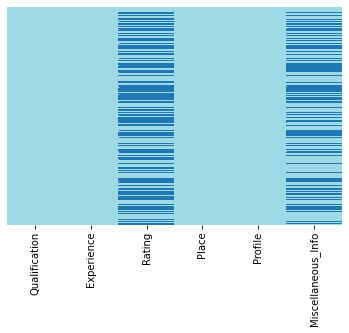

In [1519]:
# Now again check it via visualization
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

In [1520]:
df_test.describe()

,Qualification
count,1987.000000
mean,259.979869
std,185.961177
min,0.000000
25%,93.000000
50%,241.000000
75%,417.000000
max,629.000000


# EDA(Exploratory Data Analysis)

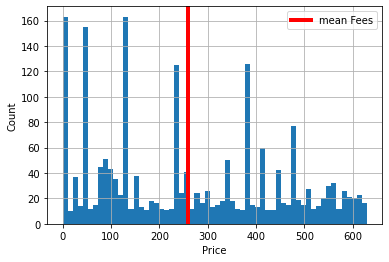

In [1521]:
Fees = df_test['Qualification'].hist(bins=60)
mean_val = np.mean(df_test['Qualification'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean Fees')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

In [1522]:
df_test['Qualification'].unique()

array([241, 340, 258,   6,  79,  78,  99, 542, 128,  51, 359, 247, 383,
       610, 349, 144, 519, 100, 115, 417, 616, 341, 483, 121, 183,  27,
       275, 155, 136, 285, 507, 235,  73, 409, 505, 581, 510,  44, 162,
       486, 363, 451, 126, 237, 480, 450, 198, 266, 345,  87, 303, 629,
       184,  93, 442, 428, 577, 255,   3, 494, 479,  97, 163, 553,  70,
       575, 384, 103, 280, 590, 140, 465, 602, 338, 288, 105, 552, 585,
       392, 319, 355,  92,  67,  90, 321,  50, 549, 293, 492, 214, 188,
       457, 329, 170,  46, 600,  23, 205, 594, 524, 281, 458, 210, 122,
       460, 551, 447,  60,  68, 330, 468, 588, 138, 264,  24, 272, 348,
       408, 548, 584, 405, 488, 296, 292, 337, 297, 228, 193, 173, 134,
       604, 108, 208, 475, 446, 347,  69, 232, 378, 316, 334,  77, 365,
       182, 146, 586, 490, 106, 568,  30,  45,  71, 352,  34, 227, 589,
       351, 178, 560, 304, 236, 432, 540, 564, 192, 543, 249, 124, 320,
        86, 448, 167, 147, 454, 131, 150, 240, 427, 513, 109,   

In [1523]:
df_test['Experience'].unique()

array(['35 years experience', '31 years experience',
       '40 years experience', '0 years experience', '16 years experience',
       '14 years experience', '23 years experience', '9 years experience',
       '11 years experience', '44 years experience', '4 years experience',
       '34 years experience', '13 years experience',
       '28 years experience', '6 years experience', '32 years experience',
       '3 years experience', '8 years experience', '43 years experience',
       '27 years experience', '22 years experience',
       '25 years experience', '36 years experience',
       '17 years experience', '20 years experience',
       '18 years experience', '29 years experience', '5 years experience',
       '19 years experience', '10 years experience', '2 years experience',
       '30 years experience', '24 years experience',
       '26 years experience', '41 years experience',
       '46 years experience', '21 years experience',
       '12 years experience', '45 years experience',

In [1524]:
df_test['Rating'].unique()

array([nan, '70%', '100%', '90%', '94%', '99%', '98%', '87%', '64%',
       '96%', '95%', '97%', '93%', '69%', '71%', '83%', '92%', '80%',
       '86%', '88%', '67%', '85%', '84%', '55%', '89%', '82%', '81%',
       '60%', '73%', '65%', '77%', '91%', '78%', '79%', '76%', '52%',
       '53%'], dtype=object)

In [1525]:
df_test = df_test.join(df_test['Place'].str.split(',', expand=True).add_prefix('Place'))

In [1526]:
df_test = df_test.join(df_test['Experience'].str.split(expand=True).add_prefix('Experience'))

In [1527]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Place0,Place1,Experience0,Experience1,Experience2
0,241,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai,35,years,experience
1,340,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad,31,years,experience
2,258,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,40,years,experience
3,6,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi,0,years,experience
4,79,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,16,years,experience
...,...,...,...,...,...,...,...,...,...,...,...
1982,17,10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,Basavanagudi,Bangalore,10,years,experience
1983,548,4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,Choolai,Chennai,4,years,experience
1984,474,9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,Porur,Chennai,9,years,experience
1985,51,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore,12,years,experience


In [1528]:
df_test.drop(df_test.columns[[1,3,5,9,10]],axis=1,inplace=True)

In [1529]:
df_test

,Qualification,Rating,Profile,Place0,Place1,Experience0
0,241,NaN,General Medicine,Ghatkopar East,Mumbai,35
1,340,NaN,ENT Specialist,West Marredpally,Hyderabad,31
2,258,70%,Dermatologists,KK Nagar,Chennai,40
3,6,NaN,Ayurveda,New Ashok Nagar,Delhi,0
4,79,100%,Dentist,Kanakpura Road,Bangalore,16
...,...,...,...,...,...,...
1982,17,NaN,Ayurveda,Basavanagudi,Bangalore,10
1983,548,NaN,Dermatologists,Choolai,Chennai,4
1984,474,NaN,General Medicine,Porur,Chennai,9
1985,51,98%,Dentist,Arekere,Bangalore,12


In [1530]:
df_test['Rating'] = df_test['Rating'].str.rstrip('%').astype('float') / 100.0

In [1531]:
df_test.rename(columns = {'Place0':'Location'}, inplace = True) 
df_test.rename(columns = {'Place1':'City'}, inplace = True)
df_test.rename(columns = {'Experience0':'Experience'}, inplace =True)

In [1532]:
df_test

,Qualification,Rating,Profile,Location,City,Experience
0,241,NaN,General Medicine,Ghatkopar East,Mumbai,35
1,340,NaN,ENT Specialist,West Marredpally,Hyderabad,31
2,258,0.70,Dermatologists,KK Nagar,Chennai,40
3,6,NaN,Ayurveda,New Ashok Nagar,Delhi,0
4,79,1.00,Dentist,Kanakpura Road,Bangalore,16
...,...,...,...,...,...,...
1982,17,NaN,Ayurveda,Basavanagudi,Bangalore,10
1983,548,NaN,Dermatologists,Choolai,Chennai,4
1984,474,NaN,General Medicine,Porur,Chennai,9
1985,51,0.98,Dentist,Arekere,Bangalore,12


In [1533]:
le=LabelEncoder()
df_test['Profile']=le.fit_transform(df_test['Profile'])
df_test['Profile']

0       4
1       3
2       2
3       0
4       1
       ..
1982    0
1983    2
1984    4
1985    1
1986    2
Name: Profile, Length: 1987, dtype: int32

In [1534]:
cols_object_str=["City"]
for col in cols_object_str:
    df_test[col]=df_test[col].astype(str)

In [1535]:
cols_object_str=["Location"]
for col in cols_object_str:
    df_test[col]=df_test[col].astype(str)

In [1536]:
df_test['City'].unique

<bound method Series.unique of 0           Mumbai
1        Hyderabad
2          Chennai
3            Delhi
4        Bangalore
           ...    
1982     Bangalore
1983       Chennai
1984       Chennai
1985     Bangalore
1986       Chennai
Name: City, Length: 1987, dtype: object>

In [1537]:
df_test['Location'].unique

<bound method Series.unique of 0         Ghatkopar East
1       West Marredpally
2               KK Nagar
3        New Ashok Nagar
4         Kanakpura Road
              ...       
1982        Basavanagudi
1983             Choolai
1984               Porur
1985             Arekere
1986        Pallikaranai
Name: Location, Length: 1987, dtype: object>

In [1538]:
le=LabelEncoder()
df_test['City']=le.fit_transform(df_test['City'])
df_test['City']

0       6
1       5
2       1
3       3
4       0
       ..
1982    0
1983    1
1984    1
1985    0
1986    1
Name: City, Length: 1987, dtype: int32

In [1539]:
le=LabelEncoder()
df_test['Location']=le.fit_transform(df_test['Location'])
df_test['Location']

0       142
1       577
2       212
3       373
4       231
       ... 
1982     58
1983     96
1984    423
1985     26
1986    393
Name: Location, Length: 1987, dtype: int32

In [1540]:
df_test.isnull().sum()

Qualification       0
Rating           1090
Profile             0
Location            0
City                0
Experience          0
dtype: int64

In [1541]:
df_test.mean()

Qualification    259.979869
Rating             0.944415
Profile            2.508807
Location         289.932058
City               3.037745
Experience              inf
dtype: float64

In [1542]:
df_test.fillna(df_test.mean(), inplace=True)

In [1543]:
df_test['Rating']=df_test['Rating'].fillna((df_test['Rating'].mode))

In [1544]:
df_test.isnull().sum()

Qualification    0
Rating           0
Profile          0
Location         0
City             0
Experience       0
dtype: int64

In [1545]:
df_test

,Qualification,Rating,Profile,Location,City,Experience
0,241,0.944415,4,142,6,35
1,340,0.944415,3,577,5,31
2,258,0.700000,2,212,1,40
3,6,0.944415,0,373,3,0
4,79,1.000000,1,231,0,16
...,...,...,...,...,...,...
1982,17,0.944415,0,58,0,10
1983,548,0.944415,2,96,1,4
1984,474,0.944415,4,423,1,9
1985,51,0.980000,1,26,0,12


In [1546]:
# Loading the model

fitted_model = pickle.load(open("model.pkl1","rb"))

In [1547]:
fitted_model

RandomForestRegressor(n_estimators=20, random_state=59)

In [1548]:
df_test.columns

Index(['Qualification', 'Rating', 'Profile', 'Location', 'City', 'Experience'], dtype='object')

In [1549]:
# Data visualizations
# To check missing values

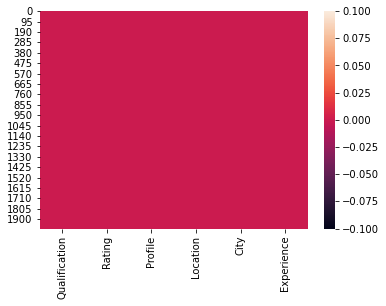

In [1550]:
sns.heatmap(df_test.isnull())

In [1551]:
# To check Correlation

In [1552]:
df_testcor=df_test.corr()
df_testcor

,Qualification,Rating,Profile,Location,City
Qualification,1.000000,-0.143553,0.372002,0.020665,-0.036618
Rating,-0.143553,1.000000,-0.110135,-0.004810,0.031174
Profile,0.372002,-0.110135,1.000000,-0.005737,0.029252
Location,0.020665,-0.004810,-0.005737,1.000000,-0.089014
City,-0.036618,0.031174,0.029252,-0.089014,1.000000


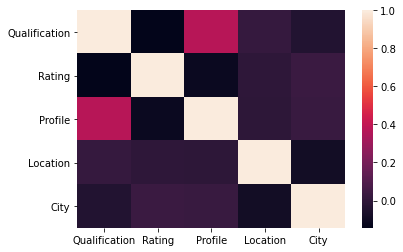

In [1553]:
sns.heatmap(df_testcor)

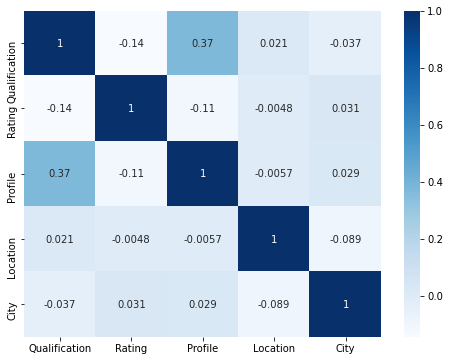

In [1554]:
plt.figure(figsize=(8,6))
sns.heatmap(df_testcor,cmap='Blues',annot=True)

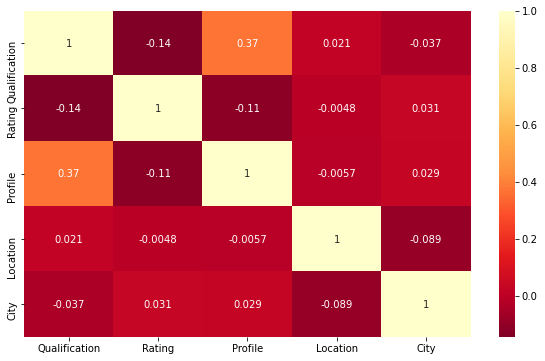

In [1555]:
plt.figure(figsize=(10,6))
sns.heatmap(df_testcor,cmap='YlOrRd_r',annot=True)

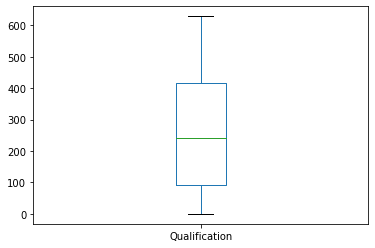

In [1556]:
#univariate analysis
df_test['Qualification'].plot.box()

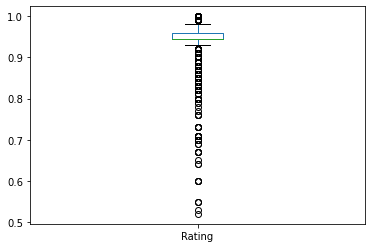

In [1557]:
df_test['Rating'].plot.box()

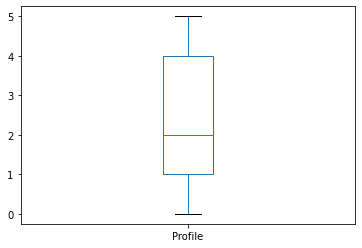

In [1558]:
df_test['Profile'].plot.box()

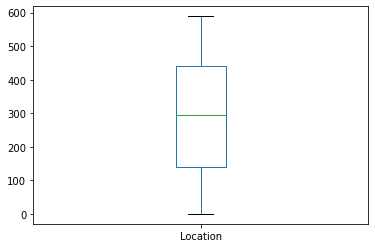

In [1559]:
df_test['Location'].plot.box()

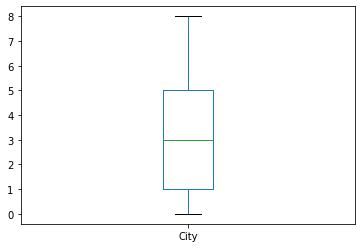

In [1560]:
df_test['City'].plot.box()

In [1561]:
df_train.dtypes

Qualification      int32
Rating           float64
Profile            int32
Fees               int64
Location           int32
City               int32
Experience         int32
dtype: object

In [1562]:
cols_object_float=["Experience"]
for col in cols_object_float:
    df_test[col]=df_test[col].astype(float)

In [1563]:
df_test.dtypes

Qualification      int32
Rating           float64
Profile            int32
Location           int32
City               int32
Experience       float64
dtype: object

In [1564]:
collist=df_test.columns.values
ncol=12
nrows=10

In [1565]:
plt.subplot?

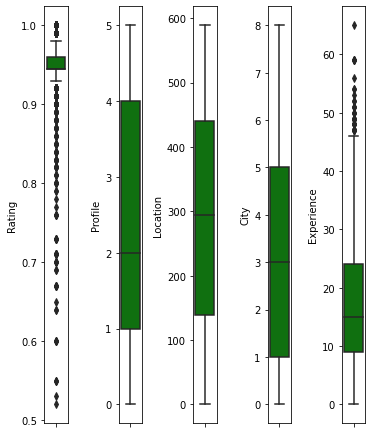

In [1566]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [1567]:
# To check distribution of skewness

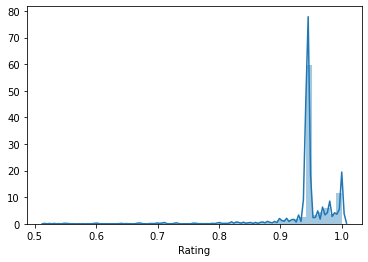

In [1568]:
sns.distplot(df_test['Rating'])

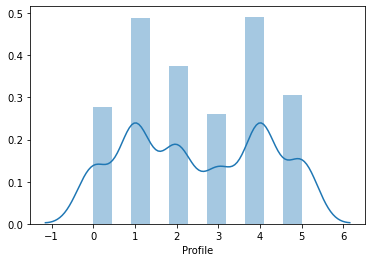

In [1569]:
sns.distplot(df_test['Profile'])

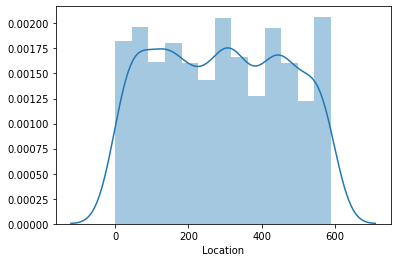

In [1570]:
sns.distplot(df_test['Location'])

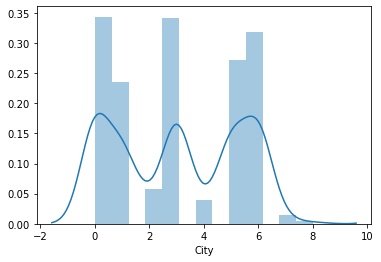

In [1571]:
sns.distplot(df_test['City'])

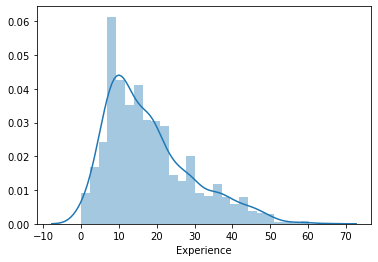

In [1572]:
sns.distplot(df_test['Experience'])

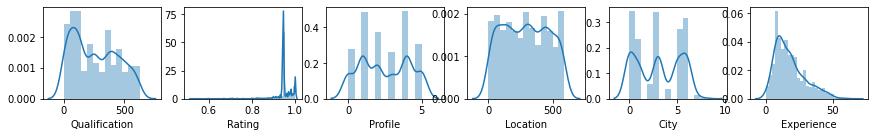

In [1573]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_test[collist[i]])

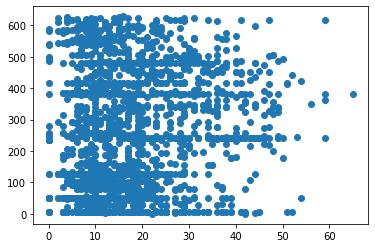

In [1574]:
#bivariate analysis
plt.scatter(df_test['Experience'],df_test['Qualification'])

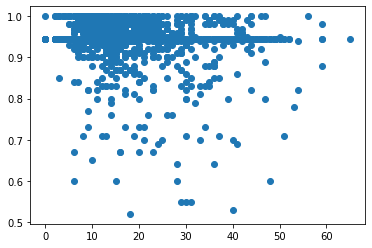

In [1575]:
plt.scatter(df_test['Experience'],df_test['Rating'])

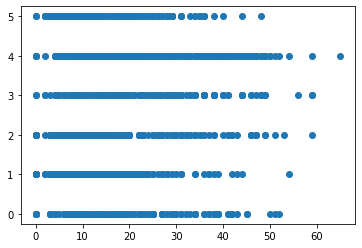

In [1576]:
plt.scatter(df_test['Experience'],df_test['Profile'])

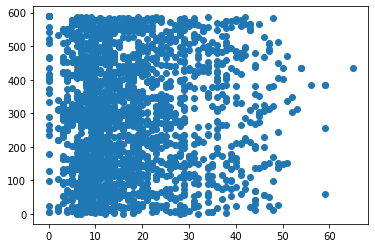

In [1577]:
plt.scatter(df_test['Experience'],df_test['Location'])

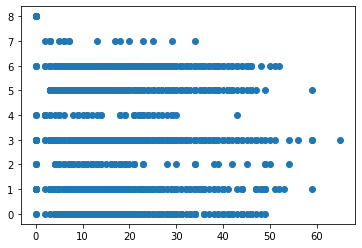

In [1578]:
plt.scatter(df_test['Experience'],df_test['City'])

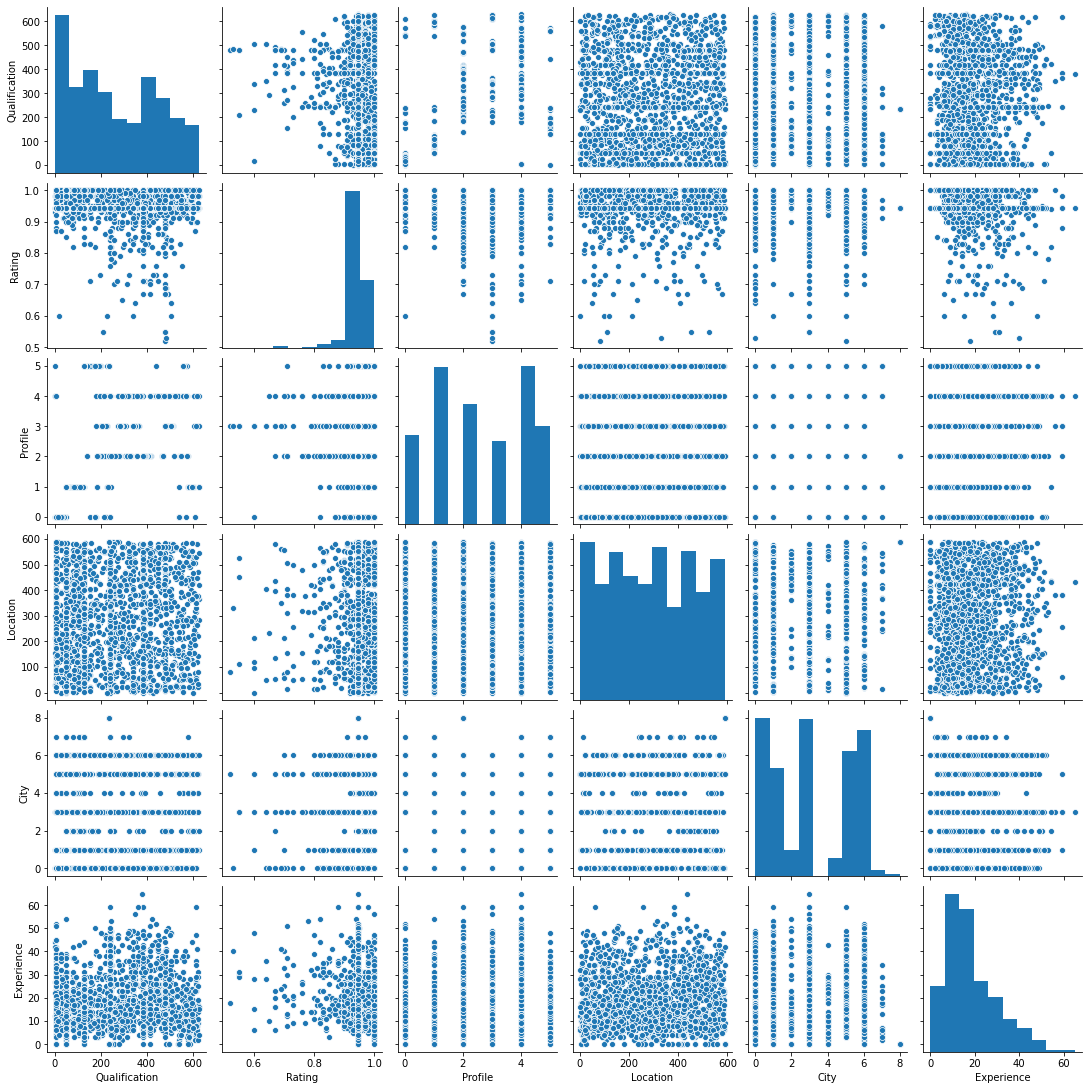

In [1579]:
sns.pairplot(df_test)

In [1580]:
# Load the model

fitted_model= pickle.load(open("model.pkl1","rb"))

In [1581]:
fitted_model

RandomForestRegressor(n_estimators=20, random_state=59)

In [1582]:
# Prediction over test data

predictions=fitted_model.predict(df_test)

In [1583]:
predictions

array([5.15, 4.9 , 5.05, ..., 4.95, 5.2 , 5.05])

In [1584]:
test_df=pd.DataFrame(predrf)
test_df.to_csv('rfdoc_predictons.csv')

In [1585]:
df_train1

,Qualification,Rating,Profile,Fees,Location,City,Experience
0,401,1.000000,5,4,297,4,3.218876
1,73,0.980000,0,5,856,0,2.564949
2,1135,0.946435,3,5,453,0,2.302585
3,464,0.946435,0,5,69,0,2.564949
4,10,1.000000,0,5,336,1,3.044522
...,...,...,...,...,...,...,...
5956,1075,0.980000,3,5,71,0,2.995732
5957,596,0.946435,4,4,536,1,3.526361
5958,596,0.970000,4,6,216,3,3.737670
5959,943,0.900000,4,4,841,6,2.772589


In [1590]:
df_test

,Qualification,Rating,Profile,Location,City,Experience
0,241,0.944415,4,142,6,35.0
1,340,0.944415,3,577,5,31.0
2,258,0.700000,2,212,1,40.0
3,6,0.944415,0,373,3,0.0
4,79,1.000000,1,231,0,16.0
...,...,...,...,...,...,...
1982,17,0.944415,0,58,0,10.0
1983,548,0.944415,2,96,1,4.0
1984,474,0.944415,4,423,1,9.0
1985,51,0.980000,1,26,0,12.0
